In [1]:
from re_eval_methods import *
from scipy.special import comb
from helper_functions import *
from Horn import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\sophi\Miniconda3\envs\MT\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Define the binarizer and its lookup.

In [2]:
country_file = 'data/country_list_continents.csv'
occ_file = 'data/occupations_subset.csv'
binarizer = Binarizer(country_file, 5, occ_file)

lookup = get_lookup(binarizer)

This cell saves the background to file.

In [ ]:
dim = sum(binarizer.lengths.values()) + 2
V = define_variables(dim)

background = {(~(V[0] & V[1])),
(~(V[0] & V[2])),
(~(V[0] & V[3])),
(~(V[0] & V[4])),
(~(V[1] & V[2])),
(~(V[1] & V[3])),
(~(V[1] & V[4])),
(~(V[2] & V[3])),
(~(V[2] & V[4])),
(~(V[3] & V[4])),
(~(V[5] & V[6])),
(~(V[5] & V[7])),
(~(V[5] & V[8])),
(~(V[5] & V[9])),
(~(V[5] & V[10])),
(~(V[5] & V[11])),
(~(V[5] & V[12])),
(~(V[5] & V[13])),
(~(V[6] & V[7])),
(~(V[6] & V[8])),
(~(V[6] & V[9])),
(~(V[6] & V[10])),
(~(V[6] & V[11])),
(~(V[6] & V[12])),
(~(V[6] & V[13])),
(~(V[7] & V[8])),
(~(V[7] & V[9])),
(~(V[7] & V[10])),
(~(V[7] & V[11])),
(~(V[7] & V[12])),
(~(V[7] & V[13])),
(~(V[8] & V[9])),
(~(V[8] & V[10])),
(~(V[8] & V[11])),
(~(V[8] & V[12])),
(~(V[8] & V[13])),
(~(V[9] & V[10])),
(~(V[9] & V[11])),
(~(V[9] & V[12])),
(~(V[9] & V[13])),
(~(V[10] & V[11])),
(~(V[10] & V[12])),
(~(V[10] & V[13])),
(~(V[11] & V[12])),
(~(V[11] & V[13])),
(~(V[12] & V[13])),
(~(V[14] & V[15])),
(~(V[14] & V[16])),
(~(V[14] & V[17])),
(~(V[14] & V[18])),
(~(V[14] & V[19])),
(~(V[14] & V[20])),
(~(V[14] & V[21])),
(~(V[15] & V[16])),
(~(V[15] & V[17])),
(~(V[15] & V[18])),
(~(V[15] & V[19])),
(~(V[15] & V[20])),
(~(V[15] & V[21])),
(~(V[16] & V[17])),
(~(V[16] & V[18])),
(~(V[16] & V[19])),
(~(V[16] & V[20])),
(~(V[16] & V[21])),
(~(V[17] & V[18])),
(~(V[17] & V[19])),
(~(V[17] & V[20])),
(~(V[17] & V[21])),
(~(V[18] & V[19])),
(~(V[18] & V[20])),
(~(V[18] & V[21])),
(~(V[19] & V[20])),
(~(V[19] & V[21])),
(~(V[20] & V[21])),
(~(V[22] & V[23])),
}

with open('data_new/background.txt', 'wb') as f:
    pickle.dump(background, f)

# Single evaluation

In this section, one can evaluate a single experimental result by converting the rules and print them out. A single experimental result means, all runs of one experiment setup (10 for the lower EQ nubmers).

First, all rules from the file are loaded and converted into lists / dictionaries and concatenated into a list of all rules over all experiments.

In [13]:
""" Set the parameters for the desired experiment """

e = 1  # defines the number of experiments per setup
lm = 'roberta-base'
eq = 5000

In [14]:
experiments = range(1,e+1)
background = load_background()
all_negations = []
all_implications = []
for ex in experiments:
    h = load_rules(lm, eq, ex)
    all_rules = get_all_rules(h, background)
    (rules, negations, implications) = make_rule_lists(all_rules)
    all_negations = [*all_negations, *negations]
    all_implications = [*all_implications, *implications]

Count the rules over all experiments and print them out. (This includes **all** implications).

In [15]:
negations_count = count_lists(all_negations)
implications_count = count_lists(all_implications)
print_all_counted_rules(negations_count, implications_count, lookup)

0.100  :  not (Eurasia & dancer & female & between 1951 and 1970 )
0.100  :  not (before 1875 & nurse & male & Europe )
0.100  :  not (dancer & female & between 1951 and 1970 & South America )
0.100  :  not (nurse & male & Africa )
0.100  :  not (dancer & male & Africa )
0.100  :  not (Oceania & dancer & male )
0.100  :  not (nurse & male & after 1970 & Asia )
0.100  :  not (dancer & female & between 1951 and 1970 & Asia )
0.100  :  not (Oceania & singer & female )
0.100  :  not (Americas & dancer & male & between 1951 and 1970 )
0.100  :  not (between 1875 and 1925 & Americas & dancer & male )
0.100  :  not (between 1875 and 1925 & nurse & male & Europe )
0.100  :  not (Eurasia & nurse & male & after 1970 )
0.100  :  not (between 1875 and 1925 & nurse & male & North America )
0.100  :  not (between 1875 and 1925 & dancer & male & South America )
0.100  :  not (before 1875 & Eurasia & dancer & male )
0.100  :  not (Americas & singer & female )
0.100  :  not (nurse & between 1925 and 19

Do the same, but exclude implications that are derived from a negation.

In [16]:
relevant_implications = []
for rule in all_implications:
    if rule['body'] not in all_negations:
        relevant_implications.append(rule)
relevant_implications_count = count_lists(relevant_implications)
print_all_counted_rules(negations_count, relevant_implications_count, lookup)

0.100  :  not (Eurasia & dancer & female & between 1951 and 1970 )
0.100  :  not (before 1875 & nurse & male & Europe )
0.100  :  not (dancer & female & between 1951 and 1970 & South America )
0.100  :  not (nurse & male & Africa )
0.100  :  not (dancer & male & Africa )
0.100  :  not (Oceania & dancer & male )
0.100  :  not (nurse & male & after 1970 & Asia )
0.100  :  not (dancer & female & between 1951 and 1970 & Asia )
0.100  :  not (Oceania & singer & female )
0.100  :  not (Americas & dancer & male & between 1951 and 1970 )
0.100  :  not (between 1875 and 1925 & Americas & dancer & male )
0.100  :  not (between 1875 and 1925 & nurse & male & Europe )
0.100  :  not (Eurasia & nurse & male & after 1970 )
0.100  :  not (between 1875 and 1925 & nurse & male & North America )
0.100  :  not (between 1875 and 1925 & dancer & male & South America )
0.100  :  not (before 1875 & Eurasia & dancer & male )
0.100  :  not (Americas & singer & female )
0.100  :  not (nurse & between 1925 and 19

Write them formatted to a file

In [18]:
filename_string = 'data/rule_extraction_final/formatted/' + lm + '_' + str(eq) +'.txt'
filename_latex = 'data/rule_extraction_final/formatted/' + lm + '_' + str(eq) +'_latex.txt'
for rule, count in sorted(negations_count, key=lambda rule: rule[1], reverse=True):
    rule_string = negation_to_string(rule, lookup)
    with open(filename_string, 'a') as f:
        line = "{:.3f}  :  {rule}".format(count/10, rule=rule_string)
        #print(line)
        f.write(line + '\n')
    with open(filename_latex, 'a') as f:
        line = "{} & {rule} \\\\".format(count, rule=negation_to_latex(rule, lookup))
        f.write(line + '\n')

for rule, count in sorted(relevant_implications_count, key=lambda rule: rule[1], reverse=True):
    rule_string = implication_to_string(rule, lookup)
    with open(filename_string, 'a') as f:
        line = "{:.3f}  :  {rule}".format(count/10, rule=rule_string)
        #print(line)
        f.write(line + '\n')
    with open(filename_latex, 'a') as f:
        line = "{} & {rule} \\\\".format(count, rule=implication_to_latex(rule, lookup))
        f.write(line + '\n')

Special sorting for the terminated runs

In [26]:
filename_string = 'data/rule_extraction_final/formatted/' + lm + '_' + str(eq) +'.txt'
filename_latex = 'data/rule_extraction_final/formatted/' + lm + '_' + str(eq) +'_latex.txt'
for rule in sorted(all_negations, key=lambda rule : len(rule)):
    rule_string = negation_to_string(rule, lookup)
    with open(filename_latex, 'a') as f:
        line = "${rule} \\\\".format(rule=negation_to_latex(rule, lookup))
        f.write(line + '\n')

for rule in sorted(relevant_implications, key=lambda rule : len(rule['body'])):
    rule_string = implication_to_string(rule, lookup)
    with open(filename_latex, 'a') as f:
        line = "${rule} \\\\".format(rule=implication_to_latex(rule, lookup))
        f.write(line + '\n')

# Single Runtime evaluation

Evaluates the runtime of a single experimental setup with its multiple runs (10 for up to 200 EQs).

In [3]:
""" Set the parameters for the desired experiment """

e = 1  # defines the number of experiments per setup
lm = 'roberta-base'
eq = 5000

In [4]:
experiments = range(1,e+1)
total_runtime = 0
df = pd.DataFrame(columns=['samples', 'runtime', 'iteration'])
for ex in experiments:
    data_dict = get_data_dict(lm, eq, ex)
    total_runtime = total_runtime + float(data_dict['data']['runtime'])
    sample_list = data_dict['data']['average_sample']
    sample_df = make_sample_df(sample_list, eq=0)
    df = pd.concat([df, sample_df])
total_runtime = total_runtime / len(experiments)
print("{lm} - {e} EQs:".format(lm=lm, e=e))
print("\truntime average: {r:.2f} sec = {r1:.2f} min = {r2:.2f} h".format(r=total_runtime, r1 = total_runtime/60, r2=total_runtime/60/60))

roberta-base - 1 EQs:
	runtime average: 216035.63 sec = 3600.59 min = 60.01 h


In [6]:
print(df)

     samples      runtime  iteration
0        2.0     1.578248        1.0
1        2.0     0.810781        2.0
2        1.0     3.376113        3.0
3        1.0     0.720147        4.0
4        1.0     0.453650        5.0
..       ...          ...        ...
444    208.0  1953.759390      445.0
445    395.0   463.507908      446.0
446    788.0  2473.664651      447.0
447    587.0  2349.417094      448.0
448   5416.0  4842.446442      449.0

[449 rows x 3 columns]


Visualize the amount of samples per equivalence query and the average

<AxesSubplot:xlabel='iteration', ylabel='samples'>

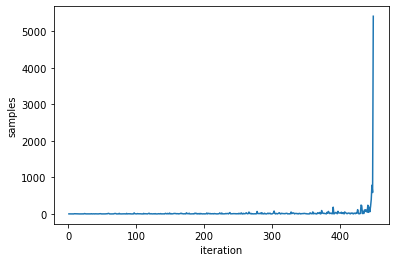

In [7]:
sns.lineplot(data=df, x='iteration', y='samples')

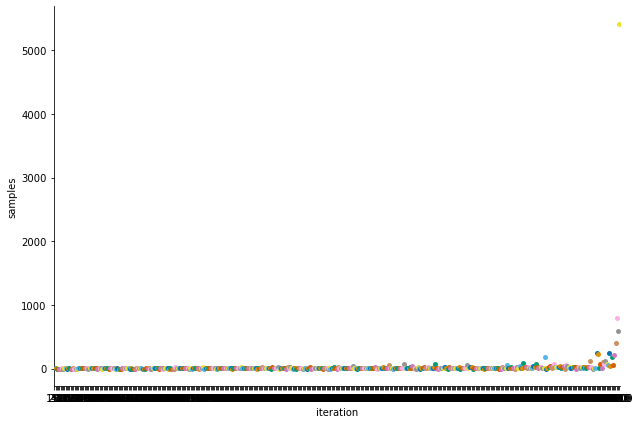

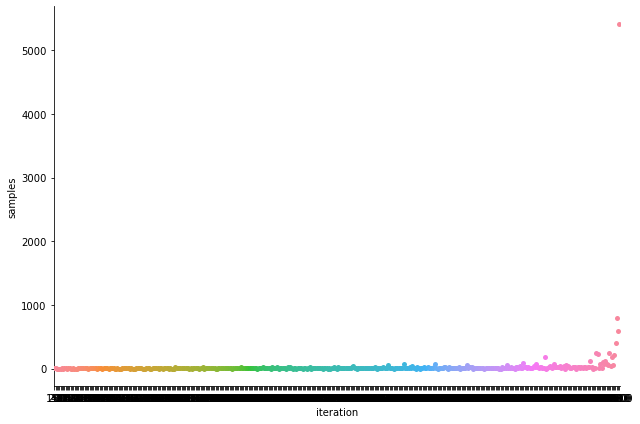

In [5]:
sns.catplot(data=df, x='iteration', y='samples', height=6, aspect=1.5, palette='colorblind')
sns.catplot(data=df.groupby('iteration', as_index=False)['samples'].mean(), x='iteration', y='samples', height=6, aspect=1.5)

And do a similar visualization for the average runtime at each equivalence query.

<AxesSubplot:xlabel='iteration', ylabel='runtime'>

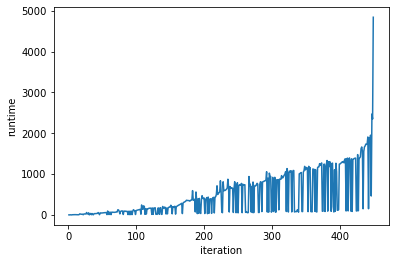

In [8]:
sns.lineplot(data=df, x='iteration', y='runtime')

In [ ]:
sns.catplot(data=df, x='iteration', y='runtime', height=6, aspect=1.5)
sns.catplot(data=df.groupby('iteration', as_index=False)['runtime'].mean(), x='iteration', y='runtime', height=6, aspect=1.5)

# Runtime Evaluation All

## Evaluate per model

In [ ]:
eqs = [50, 100, 150, 200]
models = ['roberta-base', 'roberta-large', 'bert-base-cased', 'bert-large-cased']
experiments = range(1,11)

In [ ]:
runtimes_df = pd.DataFrame(columns=['lm', 'eq', 'runtime sec', 'runtime min', 'runtime h'])
frames = []
for lm in models:
    df = pd.DataFrame(columns=['samples', 'runtime', 'iteration', 'eq'])
    for eq in eqs:
        total_runtime = 0
        for ex in experiments:
            data_dict = get_data_dict(lm, eq, ex)
            total_runtime = total_runtime + float(data_dict['data']['runtime'])
            sample_list = data_dict['data']['average_sample']
            sample_df = make_sample_df(sample_list, eq=eq)
            df = pd.concat([df, sample_df], ignore_index=True)
        total_runtime = total_runtime / len(experiments)
        #print("{lm} - {e} EQs:".format(lm=lm, e=eq))
        #print("\truntime average: {r:.2f} sec = {r1:.2f} min = {r2:.2f} h".format(r=total_runtime, r1 = total_runtime/60, r2=total_runtime/60/60))
        runtime_arr = [[lm, eq, total_runtime, total_runtime / 60, total_runtime / 60 / 60]]
        runtimes_df = pd.concat([runtimes_df, pd.DataFrame(runtime_arr, columns=['lm', 'eq', 'runtime sec', 'runtime min', 'runtime h'])], ignore_index=True)
    frames.append(df)

In [ ]:
print(runtimes_df[['lm','eq','runtime min']].sort_values(by='eq'))


### Plot the average sample per iteration for all models

In [ ]:
models = ['roBERTa-base', 'roBERTa-large', 'BERT-base', 'BERT-large']

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 9))
fig.suptitle('Sample per Iteration for all Models')
for i, lm in enumerate(models):
    df = frames[i]
    data = df.groupby(['eq', 'iteration'], as_index=False)['samples'].mean()
    hue_order = [200, 150, 100, 50]
    sns.lineplot(ax=axes[int(i/2), i%2], data=data, x='iteration', y='samples', hue='eq', palette='colorblind', hue_order=hue_order)
    axes[int(i/2), i%2].set_title(lm)
    axes[int(i/2), i%2].set_ylim([0, 30])
    axes[int(i/2), i%2].legend().set_title('# EQ')
fig.tight_layout()
plt.show()

### Plot the average runtime per iteration for all models

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 9))
fig.suptitle('Runtime per Iteration for all Models')
for i, lm in enumerate(models):
    df = frames[i]
    data = df.groupby(['eq', 'iteration'], as_index=False)['runtime'].mean()
    hue_order = [200, 150, 100, 50]
    sns.lineplot(ax=axes[int(i/2), i%2], data=data, x='iteration', y='runtime', hue='eq', palette='colorblind', hue_order=hue_order)
    axes[int(i/2), i%2].set_title(lm)
    axes[int(i/2), i%2].set_ylim([0, 450])
    axes[int(i/2), i%2].legend().set_title('# EQ')
fig.tight_layout()
plt.show()

### Analyse the runtime per sample

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 9))
fig.suptitle('Average Runtime per Sample per Iteration for all Models')
for i, lm in enumerate(models):
    df = frames[i]
    df['runtime per sample'] = df['runtime'] / df['samples']
    data = df.groupby(['eq', 'iteration'], as_index=False)['runtime per sample'].mean()
    hue_order = [200, 150, 100, 50]
    sns.lineplot(ax=axes[int(i/2), i%2], data=data, x='iteration', y='runtime per sample', hue='eq', palette='colorblind', hue_order=hue_order)
    axes[int(i/2), i%2].set_title(lm)
    axes[int(i/2), i%2].set_ylim([0, 170])
    axes[int(i/2), i%2].legend().set_title('# EQ')
fig.tight_layout()
plt.show()

### Relate the runtime to the hypothesis size

In [ ]:
models = ['roberta-base', 'roberta-large', 'bert-base-cased', 'bert-large-cased']
eqs = [50, 100, 150, 200]
#eqs = [200]
experiments = range(1,11)
background = load_background()
lookup = get_lookup(binarizer)

In [ ]:
rule_df = pd.DataFrame(columns=['lm', 'eq', 'experiment', '#rules', '#relevant', 'runtime'])
for lm in models:
    for eq in eqs:
        for e in experiments:
            h = load_rules(lm, eq, e)
            all_rules = get_all_rules(h, background)
            (rules, negations, implications) = make_rule_lists(all_rules)
            relevant_implications = []
            for rule in all_implications:
                if rule['body'] not in negations:
                    relevant_implications.append(rule)
            data_dict = get_data_dict(lm, eq, e)
            runtime = float(data_dict['data']['runtime'])
            new_df = pd.DataFrame([[lm, eq, e, len(all_rules), len(relevant_implications) + len(negations), runtime]], columns=['lm', 'eq', 'experiment', '#rules', '#relevant', 'runtime'])
            rule_df = pd.concat([rule_df, new_df], ignore_index=True)

In [ ]:
rule_df['runtime per rule'] = rule_df['runtime'] / rule_df['#rules']
#print(rule_df.groupby(['lm', 'eq'], as_index=False)['runtime per rule'].mean())
mean_df = rule_df.groupby(['lm', 'eq'], as_index=False)['runtime per rule'].mean()
mean_df['mean #rules'] = rule_df.groupby(['lm', 'eq'], as_index=False)['#rules'].mean()['#rules']
mean_df['mean #relevant'] = rule_df.groupby(['lm', 'eq'], as_index=False)['#relevant'].mean()['#relevant']
mean_df['mean runtime'] = rule_df.groupby(['lm', 'eq'], as_index=False)['runtime'].mean()['runtime']
print(mean_df)

In [ ]:
sns.catplot(data=mean_df, x='eq', y='mean #rules', hue= 'lm')
sns.catplot(data=mean_df, x='eq', y='mean #relevant', hue= 'lm')
sns.catplot(data=mean_df, x='eq', y='runtime per rule', hue= 'lm')

# Runtime Evaluation roBERTa

In [17]:
eqs = [50, 100, 150, 200]
models = ['roberta-base', 'roberta-large']
experiments = range(1,11)

In [18]:
runtimes_df = pd.DataFrame(columns=['lm', 'eq', 'runtime sec', 'runtime min', 'runtime h'])
frames = []
for lm in models:
    df = pd.DataFrame(columns=['samples', 'runtime', 'iteration', 'eq'])
    for eq in eqs:
        total_runtime = 0
        for ex in experiments:
            data_dict = get_data_dict(lm, eq, ex)
            total_runtime = total_runtime + float(data_dict['data']['runtime'])
            sample_list = data_dict['data']['average_sample']
            sample_df = make_sample_df(sample_list, eq=eq)
            df = pd.concat([df, sample_df], ignore_index=True)
        total_runtime = total_runtime / len(experiments)
        #print("{lm} - {e} EQs:".format(lm=lm, e=eq))
        #print("\truntime average: {r:.2f} sec = {r1:.2f} min = {r2:.2f} h".format(r=total_runtime, r1 = total_runtime/60, r2=total_runtime/60/60))
        runtime_arr = [[lm, eq, total_runtime, total_runtime / 60, total_runtime / 60 / 60]]
        runtimes_df = pd.concat([runtimes_df, pd.DataFrame(runtime_arr, columns=['lm', 'eq', 'runtime sec', 'runtime min', 'runtime h'])], ignore_index=True)
    frames.append(df)

In [19]:
print(runtimes_df[['lm','eq','runtime min']].sort_values(by='eq'))

              lm   eq  runtime min
0   roberta-base   50    14.304320
4  roberta-large   50    16.812329
1   roberta-base  100    59.247497
5  roberta-large  100    60.671643
2   roberta-base  150   170.612575
6  roberta-large  150   161.509698
3   roberta-base  200   423.045764
7  roberta-large  200   361.568661


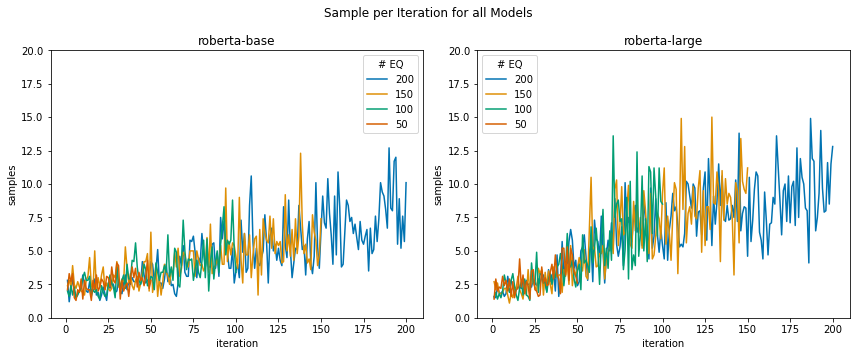

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Sample per Iteration for all Models')
for i, lm in enumerate(models):
    df = frames[i]
    data = df.groupby(['eq', 'iteration'], as_index=False)['samples'].mean()
    hue_order = [200, 150, 100, 50]
    sns.lineplot(ax=axes[i], data=data, x='iteration', y='samples', hue='eq', palette='colorblind', hue_order=hue_order)
    axes[i].set_title(lm)
    axes[i].set_ylim([0, 20])
    axes[i].legend().set_title('# EQ')
fig.tight_layout()
plt.show()

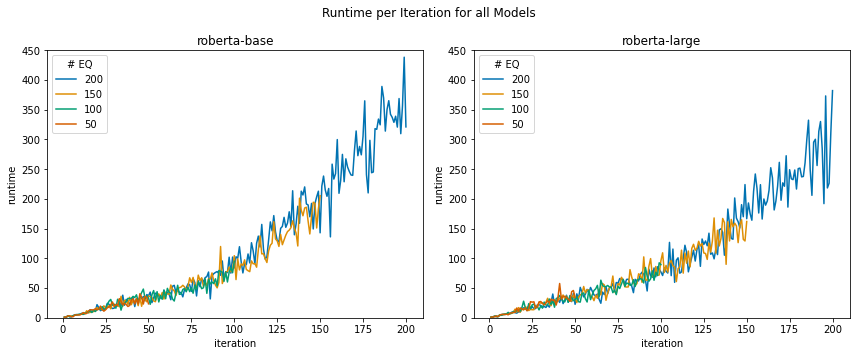

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Runtime per Iteration for all Models')
for i, lm in enumerate(models):
    df = frames[i]
    data = df.groupby(['eq', 'iteration'], as_index=False)['runtime'].mean()
    hue_order = [200, 150, 100, 50]
    sns.lineplot(ax=axes[i], data=data, x='iteration', y='runtime', hue='eq', palette='colorblind', hue_order=hue_order)
    axes[i].set_title(lm)
    axes[i].set_ylim([0, 450])
    axes[i].legend().set_title('# EQ')
fig.tight_layout()
plt.show()

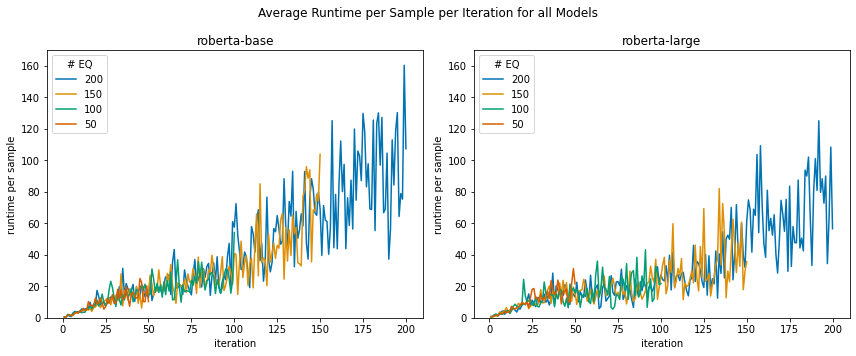

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Average Runtime per Sample per Iteration for all Models')
for i, lm in enumerate(models):
    df = frames[i]
    df['runtime per sample'] = df['runtime'] / df['samples']
    data = df.groupby(['eq', 'iteration'], as_index=False)['runtime per sample'].mean()
    hue_order = [200, 150, 100, 50]
    sns.lineplot(ax=axes[i], data=data, x='iteration', y='runtime per sample', hue='eq', palette='colorblind', hue_order=hue_order)
    axes[i].set_title(lm)
    axes[i].set_ylim([0, 170])
    axes[i].legend().set_title('# EQ')
fig.tight_layout()
plt.show()

In [30]:
background = load_background()
lookup = get_lookup(binarizer)

In [31]:
rule_df = pd.DataFrame(columns=['lm', 'eq', 'experiment', '#rules', '#relevant', 'runtime'])
for lm in models:
    for eq in eqs:
        for e in experiments:
            h = load_rules(lm, eq, e)
            all_rules = get_all_rules(h, background)
            (rules, negations, implications) = make_rule_lists(all_rules)
            relevant_implications = []
            for rule in all_implications:
                if rule['body'] not in negations:
                    relevant_implications.append(rule)
            data_dict = get_data_dict(lm, eq, e)
            runtime = float(data_dict['data']['runtime'])
            new_df = pd.DataFrame([[lm, eq, e, len(all_rules), len(relevant_implications) + len(negations), runtime]], columns=['lm', 'eq', 'experiment', '#rules', '#relevant', 'runtime'])
            rule_df = pd.concat([rule_df, new_df], ignore_index=True)

In [32]:
rule_df['runtime per rule'] = rule_df['runtime'] / rule_df['#rules']
#print(rule_df.groupby(['lm', 'eq'], as_index=False)['runtime per rule'].mean())
mean_df = rule_df.groupby(['lm', 'eq'], as_index=False)['runtime per rule'].mean()
mean_df['mean #rules'] = rule_df.groupby(['lm', 'eq'], as_index=False)['#rules'].mean()['#rules']
mean_df['mean #relevant'] = rule_df.groupby(['lm', 'eq'], as_index=False)['#relevant'].mean()['#relevant']
mean_df['mean runtime'] = rule_df.groupby(['lm', 'eq'], as_index=False)['runtime'].mean()['runtime']
print(mean_df)

              lm   eq  runtime per rule  mean #rules  mean #relevant  \
0   roberta-base   50          6.769086        153.0           945.7   
1   roberta-base  100         14.718842        248.0           665.4   
2   roberta-base  150         23.615715        442.4           622.1   
3   roberta-base  200         47.711851        536.1           600.4   
4  roberta-large   50          6.354711        163.2           858.9   
5  roberta-large  100         14.614358        252.1           704.4   
6  roberta-large  150         33.017226        304.3           710.9   
7  roberta-large  200         51.478340        426.2           716.5   

   mean runtime  
0    858.259188  
1   3554.849831  
2  10236.754475  
3  25382.745822  
4   1008.739725  
5   3640.298588  
6   9690.581859  
7  21694.119684  


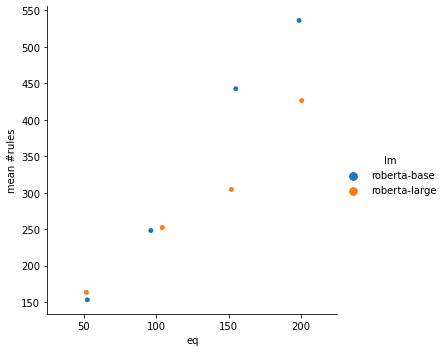

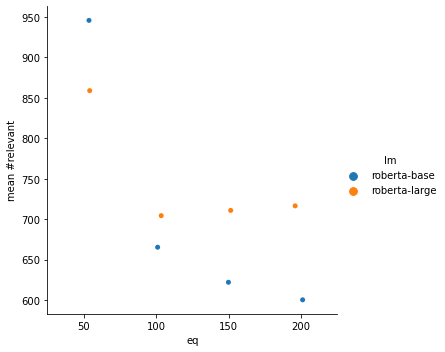

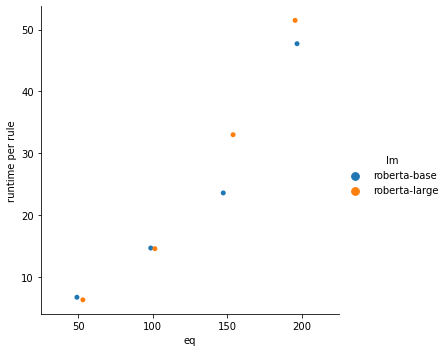

In [33]:
sns.catplot(data=mean_df, x='eq', y='mean #rules', hue= 'lm')
sns.catplot(data=mean_df, x='eq', y='mean #relevant', hue= 'lm')
sns.catplot(data=mean_df, x='eq', y='runtime per rule', hue= 'lm')

# Runtime Evaluation with Hypothesis Size

In [7]:
data = pd.read_csv('output.txt').to_numpy()
frame = pd.DataFrame(columns=['iteration', 'value', 'type'])
for row in data:
    new_rows = [[row[0], row[1], 'len_h'], [row[0], row[2], 'runtime']]
    new_df = pd.DataFrame(new_rows, columns= ['iteration', 'value', 'type'])
    frame = pd.concat([frame, new_df], ignore_index=True)
print(frame)

     iteration        value     type
0          5.0    75.000000    len_h
1          5.0     0.453650  runtime
2         10.0   143.000000    len_h
3         10.0     7.091560  runtime
4         15.0   144.000000    len_h
..         ...          ...      ...
173      435.0  1552.102194  runtime
174      440.0  1138.000000    len_h
175      440.0  1740.692678  runtime
176      445.0  1201.000000    len_h
177      445.0  1953.759390  runtime

[178 rows x 3 columns]


In [8]:
data = pd.read_csv('output.txt')
data['runtime'] = (data['runtime'] - data['runtime'].mean())/ data['runtime'].std()
data['len_h'] = (data['len_h'] - data['len_h'].mean())/ data['len_h'].std()
data = data.to_numpy()
frame_norm = pd.DataFrame(columns=['iteration', 'value', 'type'])
for row in data:
    new_rows = [[row[0], row[1], 'len_h'], [row[0], row[2], 'runtime']]
    new_df = pd.DataFrame(new_rows, columns= ['iteration', 'value', 'type'])
    frame_norm = pd.concat([frame_norm, new_df], ignore_index=True)
print(frame_norm)

     iteration     value     type
0          5.0 -1.920621    len_h
1          5.0 -0.891741  runtime
2         10.0 -1.675939    len_h
3         10.0 -0.878787  runtime
4         15.0 -1.672341    len_h
..         ...       ...      ...
173      435.0  2.136283  runtime
174      440.0  1.904328    len_h
175      440.0  2.504315  runtime
176      445.0  2.131018    len_h
177      445.0  2.920112  runtime

[178 rows x 3 columns]


<AxesSubplot:xlabel='iteration', ylabel='value'>

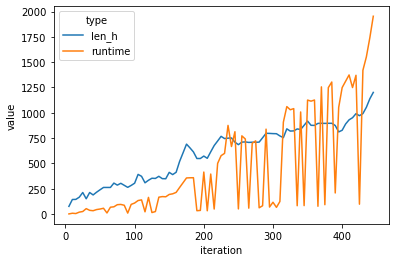

In [9]:
sns.lineplot(data=frame, x='iteration', y='value', hue='type')

<AxesSubplot:xlabel='iteration', ylabel='value'>

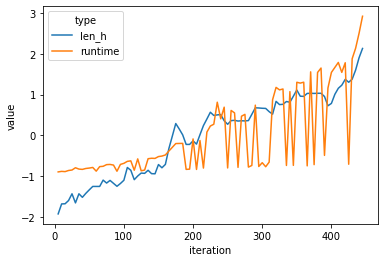

In [10]:
sns.lineplot(data=frame_norm, x='iteration', y='value', hue='type')

# Format All Rules and save to file

In [ ]:
models = ['roberta-base', 'roberta-large', 'bert-base-cased', 'bert-large-cased']
#eqs = [50, 100, 150]
eqs = [200]
experiments = range(1,11)
background = load_background()
lookup = get_lookup(binarizer)

In [ ]:
for lm in models:
    for eq in eqs:
        all_negations = []
        all_implications = []
        for e in experiments:
            h = load_rules(lm, eq, e)
            all_rules = get_all_rules(h, background)
            (rules, negations, implications) = make_rule_lists(all_rules)
            all_negations = [*all_negations, *negations]
            all_implications = [*all_implications, *implications]

        relevant_implications = []
        for rule in all_implications:
            if rule['body'] not in all_negations:
                relevant_implications.append(rule)

        negations_count = count_lists(all_negations)
        implications_count = count_lists(relevant_implications)
        
        filename_latex = 'data/rule_extraction_final/formatted/' + lm + '_' + str(eq) +'_latex.txt'

        for rule, count in sorted(negations_count, key=lambda rule: rule[1], reverse=True):
            with open(filename_latex, 'a') as f:
                line = "${}\\ :\\  {rule}\\\\".format(count, rule=negation_to_latex(rule, lookup))
                f.write(line + '\n')

        for rule, count in sorted(implications_count, key=lambda rule: rule[1], reverse=True):
            with open(filename_latex, 'a') as f:
                line = "${}\\ :\\  {rule}\\\\".format(count, rule=implication_to_latex(rule, lookup))
                f.write(line + '\n')